In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt #graphs
import numpy as np # matrix
import pandas as pd
import seaborn as sns #graphs

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from numpy import sqrt

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# 
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling



In [2]:
raw_dataset = pd.read_csv('ML SP500 raw.csv', sep=',', header=0)

dataset = raw_dataset.copy()
dataset.tail()

,DATE,Unemployment (#11),Inflation (CPI URBAN Monthly Percent Change),Industrial Production Yearly Percent Change,SP500PreviousMonth,Credit Spread (BAA minus 10-year Treasury),Term Structure (10-year minus 3-month),SP500Return
784,2018-08-01,0.038,0.003512,0.052799,0.036022,0.0188,0.0086,0.030263
785,2018-09-01,0.037,0.018185,0.054326,0.030263,0.0188,0.0087,0.004294
786,2018-10-01,0.038,0.031357,0.040994,0.004294,0.0192,0.0090,-0.069403
787,2018-11-01,0.037,-0.018872,0.039789,-0.069403,0.0210,0.0079,0.017859
788,2018-12-01,0.039,-0.059013,0.038749,0.017859,0.0230,0.0046,-0.091777


In [3]:
dataset.isna().sum()

DATE                                            0
Unemployment (#11)                              0
Inflation (CPI URBAN Monthly Percent Change)    0
Industrial Production Yearly Percent Change     0
SP500PreviousMonth                              0
Credit Spread (BAA minus 10-year Treasury)      0
Term Structure (10-year minus 3-month)          0
SP500Return                                     0
dtype: int64

In [4]:
#dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.pop("DATE")
dataset.tail()

,Unemployment (#11),Inflation (CPI URBAN Monthly Percent Change),Industrial Production Yearly Percent Change,SP500PreviousMonth,Credit Spread (BAA minus 10-year Treasury),Term Structure (10-year minus 3-month),SP500Return
784,0.038,0.003512,0.052799,0.036022,0.0188,0.0086,0.030263
785,0.037,0.018185,0.054326,0.030263,0.0188,0.0087,0.004294
786,0.038,0.031357,0.040994,0.004294,0.0192,0.0090,-0.069403
787,0.037,-0.018872,0.039789,-0.069403,0.0210,0.0079,0.017859
788,0.039,-0.059013,0.038749,0.017859,0.0230,0.0046,-0.091777


In [5]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
train_stats = train_dataset.describe()
train_stats.pop("SP500Return")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Unemployment (#11),631.0,0.059035,0.016101,0.025000,0.048000,0.056000,0.070000,0.108000
Inflation (CPI URBAN Monthly Percent Change),631.0,0.003566,0.029373,-0.116168,-0.007042,0.000000,0.013254,0.275085
Industrial Production Yearly Percent Change,631.0,0.026470,0.052263,-0.166431,0.005601,0.031113,0.058282,0.196118
SP500PreviousMonth,631.0,0.007649,0.041931,-0.217630,-0.017529,0.010091,0.034924,0.163047
Credit Spread (BAA minus 10-year Treasury),631.0,0.019096,0.008474,0.002900,0.012400,0.018200,0.024600,0.060100
Term Structure (10-year minus 3-month),631.0,0.014932,0.011641,-0.026500,0.006500,0.014700,0.024100,0.044200


In [7]:
train_labels = train_dataset.pop('SP500Return')
test_labels = test_dataset.pop('SP500Return')

In [8]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [9]:
def build_model():
  model = keras.Sequential([
    layers.Dense(6, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(6, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [11]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.0394522 ],
       [ 0.5440747 ],
       [-0.7354527 ],
       [ 0.9006826 ],
       [-0.42977792],
       [ 0.7994043 ],
       [-0.06791535],
       [-0.15962684],
       [ 0.10715709],
       [-0.12348616]], dtype=float32)

In [21]:
normed_train_data[:10]

,Unemployment (#11),Inflation (CPI URBAN Monthly Percent Change),Industrial Production Yearly Percent Change,SP500PreviousMonth,Credit Spread (BAA minus 10-year Treasury),Term Structure (10-year minus 3-month)
453,0.308381,-0.986698,-0.669181,0.409687,0.531505,0.323676
85,-0.499040,-1.101112,-0.528330,-0.600446,-1.156072,-0.372127
545,-0.809587,-0.435543,0.377430,-3.659495,0.437095,-1.110881
312,-0.064275,0.914180,0.025709,1.132873,-0.896445,-1.523209
334,0.929475,2.583910,-0.971949,-1.273324,0.319082,-2.657111
14,-0.188493,-0.121405,-2.011716,0.602408,-0.943650,0.212004
196,-1.492790,-0.121405,0.484685,-1.617596,-0.872843,-1.531799
235,-0.374822,0.250671,1.596072,0.039776,-0.235576,0.005840
55,-0.499040,-0.121405,-1.205850,-0.947022,-0.636818,-0.930488
31,-1.058024,-0.121405,2.027806,-0.908754,-1.439302,-0.724324


In [13]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.1829,  mae:0.3240,  mse:0.1829,  val_loss:0.1701,  val_mae:0.2943,  val_mse:0.1701,  
....................................................................................................

In [14]:
# Visualize the model's training progress using the stats stored in the history object.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.001595,0.031175,0.001595,0.002598,0.036684,0.002598,95
96,0.001568,0.030776,0.001568,0.002602,0.037928,0.002602,96
97,0.001587,0.030680,0.001587,0.002544,0.036545,0.002544,97
98,0.001577,0.031110,0.001577,0.002550,0.037031,0.002550,98
99,0.001570,0.030861,0.001570,0.002597,0.037778,0.002597,99


Text(0, 0.5, 'MAE [SP500Return]')

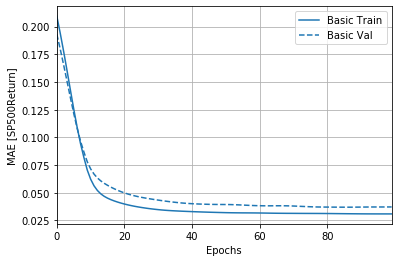

In [15]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
#plt.ylim([0, 0.05])
plt.ylabel('MAE [SP500Return]')

Text(0, 0.5, 'MSE [SP500Return^2]')

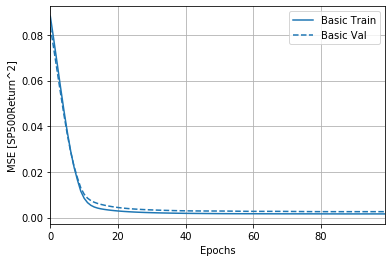

In [16]:
plotter.plot({'Basic': history}, metric = "mse")
#plt.ylim([0, 0.05])
plt.ylabel('MSE [SP500Return^2]')

In [17]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} SP500Return".format(mae))

158/158 - 0s - loss: 0.0018 - mae: 0.0319 - mse: 0.0018
Testing set Mean Abs Error:  0.03 SP500Return


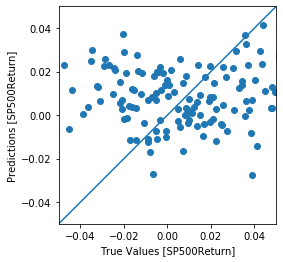

In [18]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [SP500Return]')
plt.ylabel('Predictions [SP500Return]')
lims = [-0.05, 0.05]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

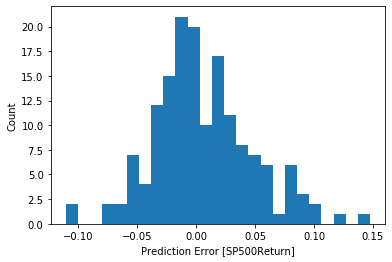

In [19]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [SP500Return]")
_ = plt.ylabel("Count")

In [20]:
#row = [0.027, -0.007874, 0.11985184, -0.023552085, 0.0082 , 0.0064]
row = [0.026,0.016129,0.16828723,-0.016299999,0.0093,0.0089]

yhat = model.predict([row])
print('Predicted: %.4f' % yhat)

Predicted: 0.0068
